### Tutorial 4: Calculating partition functions for individual species

Let's use minplascalc to calculate and graph the internal and translational partition functions of various oxygen plasma species over a range of temperatures. To do this, just execute the following code snippets in order. The text in between describes what each piece of code is doing. 

We start by importing the modules we need - matplotlib for drawing graphs, numpy for array functions, and of course minplascalc.

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import minplascalc as mpc

Then, we create some species objects for different oxygen species using their names. This requires that the data files describing the species are stored in one of the minplascalc standard data storage paths.

In [2]:
speciesnames = ["O2", "O", "O+", "O++"]
species = [mpc.species_from_name(n) for n in speciesnames]

Next, we specify a range of temperatures we're interested in calculating the partition functions at - in this case, from 1000 to 25000 K.

In [3]:
temperatures = np.linspace(1000, 25000, 100)

Then calculate the actual partition functions, using the <span style="font-family: 'Courier';">partitionfunction_translational(T)</span> and <span style="font-family: 'Courier';">partitionfunction_internal(T)</span> functions of a minplascalc Species object. Both of these take temperature T in K as an argument.

In [4]:
tpfuncs = [[sp.partitionfunction_translational(T) 
            for T in temperatures]
          for sp in species]
ipfuncs = [[sp.partitionfunction_internal(T) 
            for T in temperatures]
          for sp in species]

Finally, to visualise the results, plot all the partition functions as a function of temperature over the range specified.

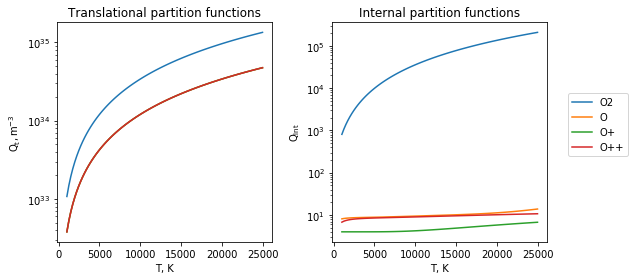

In [5]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(9,4))
ax0.set_title("Translational partition functions")
ax0.set_xlabel("T, K")
ax0.set_ylabel("$\mathregular{Q_t, m^{-3}}$")
for pf, sn in zip(tpfuncs, speciesnames):
    ax0.semilogy(temperatures, pf, label=sn);
ax1.set_title("Internal partition functions")
ax1.set_xlabel("T, K")
ax1.set_ylabel("$\mathregular{Q_{int}}$")
for pf, sn in zip(ipfuncs, speciesnames):
    ax1.semilogy(temperatures, pf, label=sn);
ax1.legend(bbox_to_anchor=(1.4, 0.7));
plt.tight_layout()